### Student details

Student name: Feiyang Li

Student ID: 23202564

# Task 1: Adaline and Gradient Descent

* Iris Data Data obtained from https://archive.ics.uci.edu/ml/datasets/iris


In [43]:
# import dependencies
import numpy as np

### Adaline class (provided)
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [44]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

In [45]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

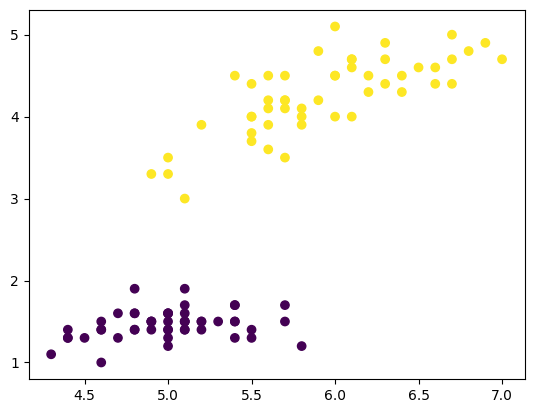

In [46]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Examine the impact of learning rate

1. Train the gradient descent algorithm with eta = 0.01, eta = 0.001, eta = 0.0001. Plot the cost as a function of epoch in each case. Note: it is useful to plot some on a log scale
2. Explain what is happening in each case?
3. How many epochs (approx) for convergence with eta = 0.0001?
4. Can you find a learning rate that converges quicker, but without overshoot?
5. The learning rate can be very sensitive, a very small change can lead to overshoot. For example, have a look at what happens between a learnign rate of 0.00045 and 0.0005, just a 5e-5 change

Please note that this is just about the simplest gradient descent implementation posssible. There are much more advanced algorithms that are typically used that improve robustness, avoid local minima, avoid overshoot and improve convergence times. So it's not all as "on a knife edge" as this example. But, in principle, picking a learning rate is still an important topic of machine learning.

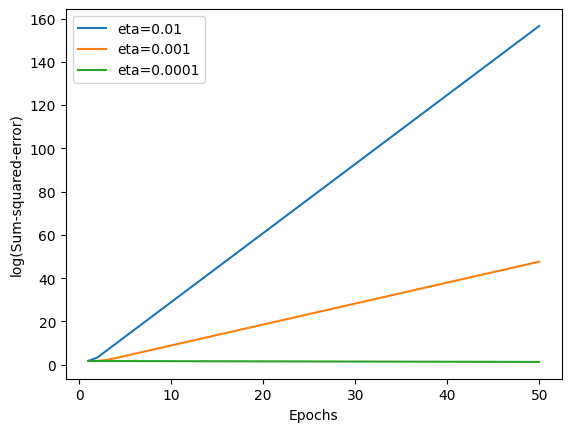

In [47]:
################################
# Your code here

etas = [0.01, 0.001, 0.0001]
epochs = 50

for eta in etas:
    model = AdalineGD(eta=eta, epochs=epochs)
    model.train(X, y)
    plt.plot(range(1, len(model.cost_) + 1), np.log10(model.cost_), label=f'eta={eta}')

plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.legend()
plt.show()


2.   
* eta = 0.01.  
This is a large learning rate. Larger adjustments of the weights in each iteration may lead to oscillations in the space of the cost function and may even lead to failure to converge. In practical situations, an unstable training process may occur.
* eta = 0.001.  
This is a moderate learning rate. It may reduce the cost function relatively steadily, but may require more iterations to reach convergence.  
* eta = 0.0001.  
This is a small learning rate. It will result in minor adjustments to the weights and may require a longer training time to converge, but may give more stable results.  
3. It is not obvious in the image how many iterations are needed. But because the learning rate is so small, it may take hundreds to thousands of iterations to converge.  
4. This requires experimentation to find the optimal learning rate. A moderately sized learning rate may strike a good balance between speed and stability. However, if the learning rate is too large, it may lead to oscillations or failure to converge; if the learning rate is too small, it may take a long time to converge.  
5. This is a small but potentially significant change in the learning rate. Increasing the learning rate may cause the adjustment of the weights to become larger, possibly leading to greater oscillations or even failure to converge in the cost function space.

### Feature Scaling

A problem with features is that they can be on a different scale, and gradient descent can struggle with this. Feature scaling can reduce the sensitivity to learning rate, and can lead to faster convergence. One of the more common approaches to feature scaling is standardisation, given by:

\begin{equation}
\textbf{x}_{j,std} = \frac{\textbf{x}_j - \mu_j}{\sigma_j}
\end{equation}

where $\mu_j$ is the mean and $\sigma_j$ is the standard deviation of $\textbf{x}_j$. Note that we don't have a good definition for the subtraction of a vector and a scalar, but here by $\textbf{x}_j - \mu_j$ we mean the subtraction of $\mu_j$ from each element of $\textbf{x}_j$.


Ref: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

1. Implement feature scaling on the data, and retrain the algorithm
2. Print the residual cost in each iteration
3. Describe how it compares to before feature scaling
4. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

Hint: in this case, the training data was scaled, so your test data has to be scaled as well.

In [48]:
################################
# Your code here

X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)


etas = [0.01, 0.001, 0.0001]
epochs = 50

for eta in etas:
    model = AdalineGD(eta=eta, epochs=epochs)
    model.train(X_scaled, y)


In [49]:
for i, cost in enumerate(model.cost_):
    print(f"Iteration {i+1}, Cost: {cost}")

Iteration 1, Cost: 50.0
Iteration 2, Cost: 48.541875121485816
Iteration 3, Cost: 47.135186547452044
Iteration 4, Cost: 45.77809023966913
Iteration 5, Cost: 44.468808383297215
Iteration 6, Cost: 43.20562700823724
Iteration 7, Cost: 41.986893695921154
Iteration 8, Cost: 40.81101536847265
Iteration 9, Cost: 39.676456157279326
Iteration 10, Cost: 38.58173534812421
Iteration 11, Cost: 37.525425400126494
Iteration 12, Cost: 36.50615003584045
Iteration 13, Cost: 35.52258239995633
Iteration 14, Cost: 34.57344328413952
Iteration 15, Cost: 33.657499415631754
Iteration 16, Cost: 32.773561807324754
Iteration 17, Cost: 31.920484167097573
Iteration 18, Cost: 31.097161364289555
Iteration 19, Cost: 30.302527951256106
Iteration 20, Cost: 29.535556738029175
Iteration 21, Cost: 28.795257418174653
Iteration 22, Cost: 28.0806752440079
Iteration 23, Cost: 27.39088974939438
Iteration 24, Cost: 26.725013518426348
Iteration 25, Cost: 26.08219099832755
Iteration 26, Cost: 25.461597354997426
Iteration 27, Cost: 

Feature scaling reduces the sensitivity to the learning rate and helps to converge faster. With feature scaling, changes in the cost function may be smoother and convergence may be faster.

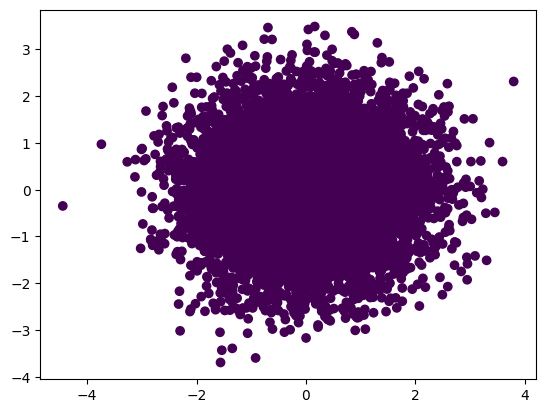

In [50]:
np.random.seed(0)
random_inputs = np.random.randn(10000, 2)

random_inputs_scaled = (random_inputs - X.mean(axis=0)) / X.std(axis=0)

predictions = model.predict(random_inputs_scaled)

plt.scatter(random_inputs[:, 0], random_inputs[:, 1], c=predictions)
plt.show()
